## <p style="text-align: center;">MIS 284N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Project 2 - Machine Learning using Scikit and AWS</p>
## <p style="text-align: center;">Total points: 100</p>
## <p style="text-align: center;">Due: Friday, October 4 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

This project is about giving exposure about Machine learning, its usage, Cloud services and why they are helpful in analyzing Big Data.

In this Project, we are trying to analyze the crime data. This data is taken from <a href=https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data> here </a>. You have to download data from here, it should be around 1.6 GB in size. You have to predict type of crime that can happen given the features.

You have to complete all the four tasks and report your observations for each if any.

Note: Please post clarification questions on Piazza. 

# Task 1 - Read the data and filter the data you need

This is open ended, you can use any features you want and drop any one of them. The 'Primary Type' is our target variable which we will be predicting for.
This task is split into multiple parts:


1.   Print the Histogram of variable 'Primary Type'. The x-axis should be each primary type, and the y-axis will the the count of each Primary type.
2. Sort the histogram in decreasing order. This will help you to understand which Primary Type of crime occured more than the rest. 
3. Now, 'K' is the total number of classes in Primary Type. Experiment with K=2,3,4,5 as the most popular Primary Type data to be used and predicted. 
4.  Given a percentage 'P', find the most number of 'K' your local system can handle during data loading, training and prediction. Report that 'K'. Ideally, you should test for a 'P' value of 60%. Meaning, you should have used 60% of the total data you are given. If you are given 1000 samples, you should use at least 600 samples and split that into train and test. 
5.  For each K=2,3,4,5 and percentage 'P', you should have trained a model and report the accuracy. (Refer to other tasks)
Hint: Split your data for each k=2,3,4,5 and P values and run individual models on them. 
Split the data into training and testing in the ratio of 80:20.

In [22]:
import pandas as pd
import numpy as np
import sklearn as sci
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.model_selection import cross_val_score

In [5]:
crimes = pd.read_csv('crimes16-19.csv')
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11834500,JC440683,09/19/2019 11:55:00 PM,019XX W 79TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,False,False,...,-87.672467,"(41.750239984, -87.672467266)",6.0,21554.0,70.0,573.0,31.0,59.0,20.0,231.0
1,11837450,JC443701,09/19/2019 11:55:00 PM,035XX S RHODES AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,-87.614452,"(41.829651528, -87.614451899)",1.0,4301.0,1.0,561.0,10.0,36.0,24.0,101.0
2,11834543,JC440668,09/19/2019 11:53:00 PM,011XX W 104TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,STREET,True,False,...,-87.650877,"(41.705024656, -87.650877274)",45.0,22212.0,72.0,595.0,22.0,13.0,9.0,253.0
3,11834471,JC440670,09/19/2019 11:50:00 PM,002XX W 63RD ST,0484,BATTERY,PRO EMP HANDS NO/MIN INJURY,CTA PLATFORM,False,False,...,-87.630937,"(41.779975054, -87.630937377)",53.0,21559.0,66.0,435.0,4.0,11.0,17.0,201.0
4,11835458,JC441818,09/19/2019 11:50:00 PM,048XX W JACKSON BLVD,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,RESIDENTIAL YARD (FRONT/BACK),False,False,...,-87.746417,"(41.876768705, -87.746417287)",11.0,22216.0,26.0,69.0,23.0,32.0,25.0,137.0


### Task 1. Question 1

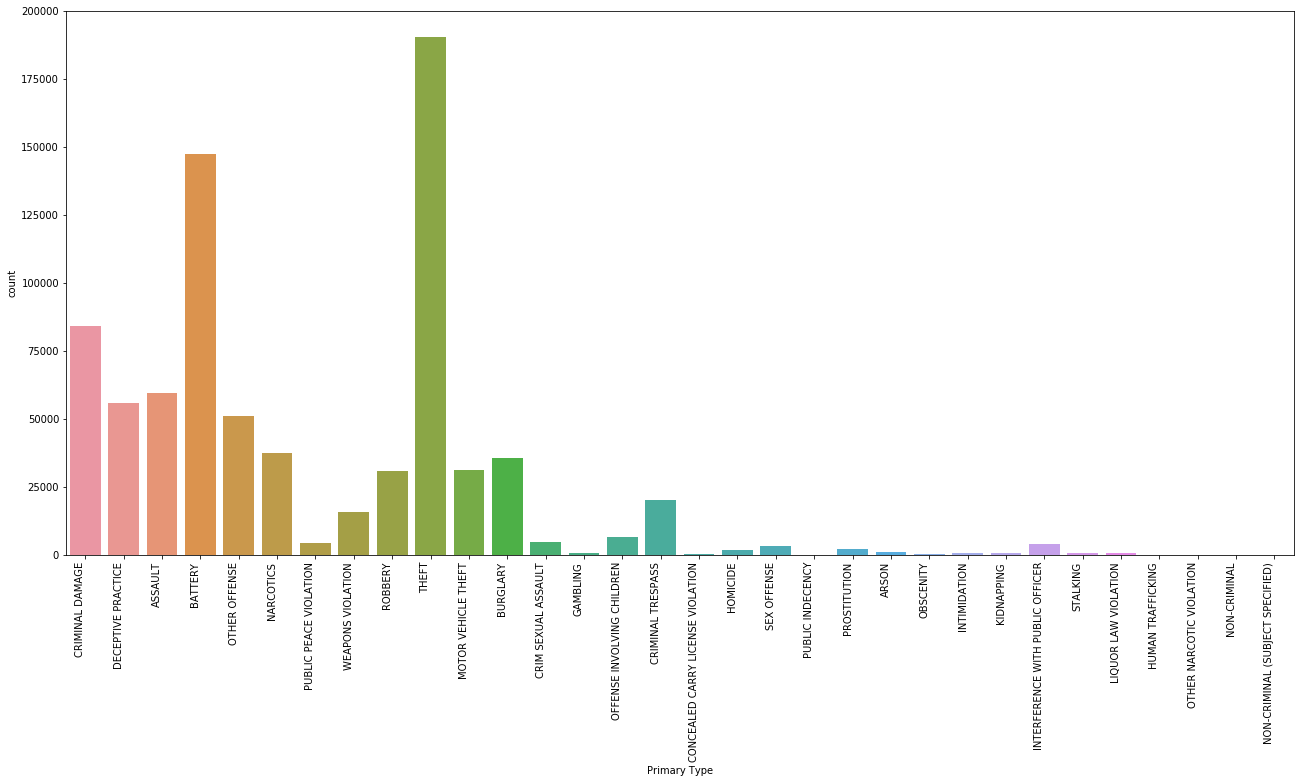

0.5830011367797852


In [8]:
## Plotting the histogram of the 'Primary Type' Column in the crimes dataset

plt.figure(figsize=(22,10)) # this creates a figure 22 inch wide, 10 inch high

## We're using seaborn library to plot the column 

ax = sns.countplot(x='Primary Type',data = crimes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

### Task 1. Question 2.

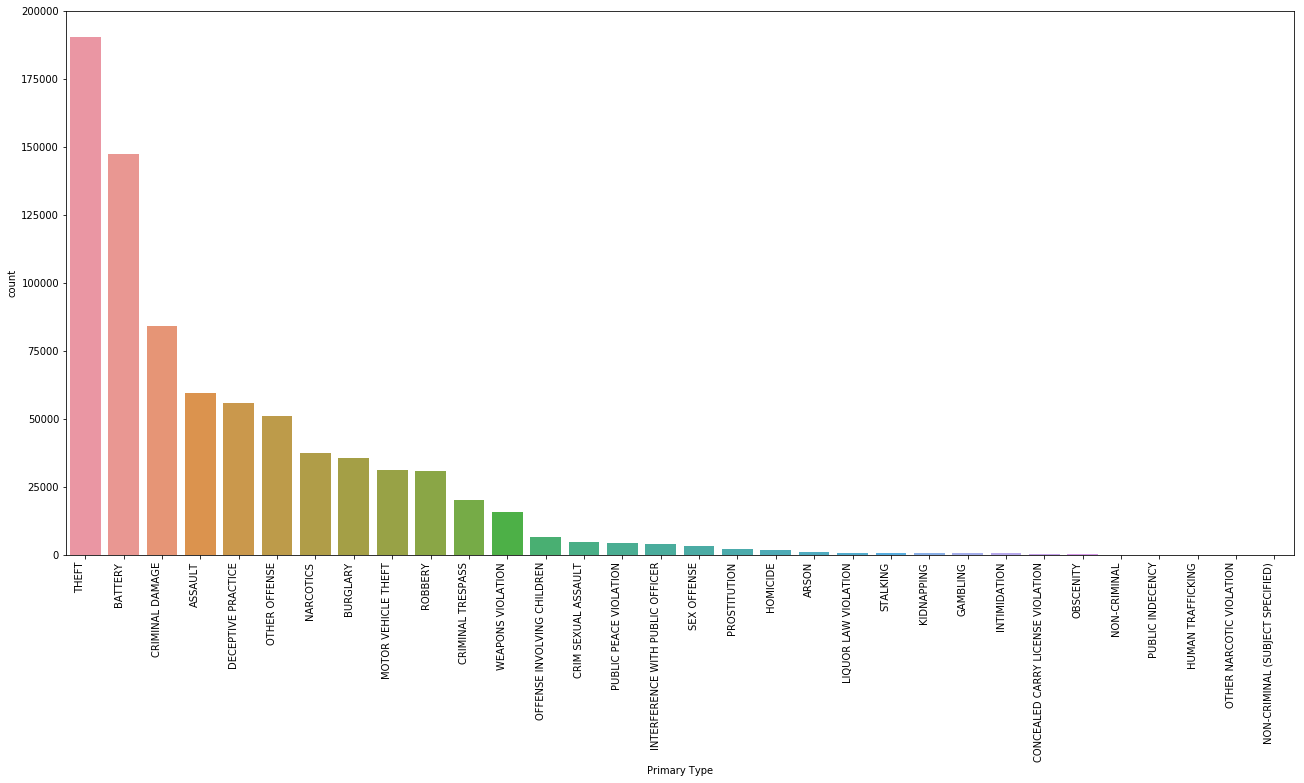

In [4]:
## Plotting in DESCENDING ORDER, the histogram of the 'Primary Type' Column in the crimes dataset

plt.figure(figsize=(22,10)) # this creates a figure 22 inch wide, 10 inch high

## We're using seaborn library to plot the column 

ax = sns.countplot(x='Primary Type',data = crimes,order = crimes['Primary Type'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

### Task 1. Question 3

In [24]:
### Here we are getting the list of top 5 most common values in the 'Primary Type' column.
### Storing the variable in array k

import collections
from collections import Counter

k = np.array([])
x = crimes['Primary Type'].to_numpy() 

### Here we get the count of each variable
b = Counter(x)

### Here we save the 5 variable with the highest count. 

for i in b.most_common(5):
    k = np.append(k,i[0])
k

array(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT',
       'DECEPTIVE PRACTICE'], dtype='<U32')

# Task 2 - Convert the features in a form that can be given as input to scikit library/functions

Here you have to search a little bit. The data that we are using has data other than numerical values. The model takes values as numerical or categorical data. You need to convert the input data to either one of these forms. 

In [36]:
### We are splitting the original date column
### Saving only the month and year of the crime
### We feel this is the only information necessary

crimesredone = crimes
crimesredone['Date Month'],d,crimesredone['Date Year']= crimesredone['Date'].str.split("/").str
crimesredone['Date Year'],w,ew = crimesredone['Date Year'].str.split(" ").str
crimesredone.iloc[0]

ID                                                 11834500
Case Number                                        JC440683
Date                                 09/19/2019 11:55:00 PM
Block                                       019XX W 79TH ST
IUCR                                                   1310
Primary Type                                CRIMINAL DAMAGE
Description                                     TO PROPERTY
Location Description                             RESTAURANT
Arrest                                                False
Domestic                                              False
Beat                                                    611
District                                                  6
Ward                                                     17
Community Area                                           71
FBI Code                                                 14
X Coordinate                                    1.16458e+06
Y Coordinate                            

In [27]:
### We are checking the number of unique values in each column
### This is to decide whether the column can be considered categorical or not.

y=pd.DataFrame(crimesredone.nunique())
y

,0
ID,791139
Case Number,791040
Date,360324
Block,32606
IUCR,346
Primary Type,32
Description,324
Location Description,146
Arrest,2
Domestic,2


In [37]:
### We are dropping the columns where the number of unique values exceed 100. 
### This is because we will not be able to quantify those columns and would prove useless in our model.

y.iloc[:,0] = y.loc[(y[0]<100)]
y = y.dropna()
new_columns = y.index.to_numpy()

### The new columns are
print("The new set of columns is: ",new_columns)
crimesredone= crimesredone[new_columns]

The new set of columns is:  ['Primary Type' 'Arrest' 'Domestic' 'District' 'Ward' 'Community Area'
 'FBI Code' 'Year' 'Historical Wards 2003-2015' 'Zip Codes'
 'Community Areas' 'Wards' 'Boundaries - ZIP Codes' 'Police Districts'
 'Date Month' 'Date Year']


In [38]:
### Adding a Primary Type 2 column so that we can map the output numerical values of y (output) to their original classes

crimesredone.loc[:,'Primary Type 2'] = crimesredone.loc[:,'Primary Type']

### Factorizing the entire dataset to convert the categorical variables into corresponding numbers

for i in new_columns:
    crimesredone.loc[:,i] = pd.factorize(crimesredone.loc[:,i])[0]
crimesredone.head(20)

C:\Users\rutwi\Anaconda_3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\rutwi\Anaconda_3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Primary Type,Arrest,Domestic,District,Ward,Community Area,FBI Code,Year,Historical Wards 2003-2015,Zip Codes,Community Areas,Wards,Boundaries - ZIP Codes,Police Districts,Date Month,Date Year,Primary Type 2
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,CRIMINAL DAMAGE
1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,DECEPTIVE PRACTICE
2,2,1,0,2,2,2,2,0,2,2,2,2,2,2,0,0,ASSAULT
3,3,0,0,3,3,3,3,0,3,3,3,3,3,3,0,0,BATTERY
4,4,0,0,4,4,4,4,0,4,4,4,4,4,4,0,0,OTHER OFFENSE
5,5,1,0,5,5,5,5,0,5,5,5,5,5,5,0,0,NARCOTICS
6,6,1,0,4,4,4,6,0,4,4,4,4,4,4,0,0,PUBLIC PEACE VIOLATION
7,3,0,1,1,1,6,3,0,1,1,6,1,1,1,0,0,BATTERY
8,7,1,0,4,6,4,7,0,6,4,4,6,4,4,0,0,WEAPONS VIOLATION
9,8,0,0,6,7,7,8,0,7,6,7,7,6,6,0,0,ROBBERY


In [39]:
crimesbase = crimesredone.copy()
crimesredone.shape

(791139, 17)

# Task 3 - Build the model

Once the features are made converted to the form accepted by scikit library, you have to build a machine learning model. Given the features predict the type of crime. 
Report the accuracy, F1, Precision and Recall of the model.

In [52]:
### Main loop
### Running the model on k=2,3,4,5 in a for loop
### We have used Random Forest Classifier for our data. 

q=np.array([])
q = k[0]
for i in range(4):
    t0 = time.time()
    
    q=np.append(q,k[i+1])
    crimesredone = crimesbase.copy()
    print("\n\n\nThe Values of the Primary Type Column selected are (k) = ",i+2," Values = ",q)
    
    ### Selecting only the rows which are the top k Primary Type.
    crimesredone = crimesredone.loc[crimesredone['Primary Type 2'].isin(q)]
    print("The percent of total dataset used is: ",int(crimesredone.shape[0]/crimes.shape[0]*100),"%\n")
   
    ### Randomize funtion since the previous operation returns a sorted dataset
    crimesredone = crimesredone.sample(frac=1, axis=1).sample(frac=1).reset_index(drop=True)

    ### Selecting x by excluding y from the dataset
    x = crimesredone.loc[:,crimesredone.columns != 'Primary Type']
    x = x.loc[:,x.columns != 'Primary Type 2']

    ### Selecting y from the dataset
    y = crimesredone['Primary Type'].to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    model = rf(n_estimators = 15) 
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    prfs = precision_recall_fscore_support(y_test, y_pred, average='macro')
    acc = accuracy_score(y_test, y_pred)
    print("The precision, Recall, F-Score and Support are: ",prfs , "\nThe accuracy is: ", round(acc,4))
          
    t1 = time.time()
    timetaken = t1-t0
    
    print("Time taken when k = ",i+2,"is: ",round(timetaken,2),"seconds")




The Values of the Primary Type Column selected are (k) =  2  Values =  ['THEFT' 'BATTERY']
The percent of total dataset used is:  42 %

The precision, Recall, F-Score and Support are:  (1.0, 1.0, 1.0, None) 
The accuracy is:  1.0
Time taken when k =  2 is:  3.03 seconds



The Values of the Primary Type Column selected are (k) =  3  Values =  ['THEFT' 'BATTERY' 'CRIMINAL DAMAGE']
The percent of total dataset used is:  53 %

The precision, Recall, F-Score and Support are:  (0.9999738213042226, 0.9999660683383665, 0.9999699434437191, None) 
The accuracy is:  1.0
Time taken when k =  3 is:  6.08 seconds



The Values of the Primary Type Column selected are (k) =  4  Values =  ['THEFT' 'BATTERY' 'CRIMINAL DAMAGE' 'ASSAULT']
The percent of total dataset used is:  60 %

The precision, Recall, F-Score and Support are:  (0.9997703547742403, 0.9998570958081451, 0.999813702452191, None) 
The accuracy is:  0.9998
Time taken when k =  4 is:  8.27 seconds



The Values of the Primary Type Column

In [53]:
print("\nSize of x:",x.shape[0],"\nSize of Training x:",X_train.shape[0],"\nSize of Testing x:",X_test.shape[0])
print("\nRatio is training x to testing x",int(X_train.shape[0]/x.shape[0]*100),":",int(X_test.shape[0]/x.shape[0]*100))


Size of x: 537296 
Size of Training x: 429836 
Size of Testing x: 107460

Ratio is training x to testing x 79 : 20


# Task 4 - Run the model on your laptop and AWS cloud and observe the time taken for reading the data, training and testing, report the same.  

Report your observations. Due to more RAM needed for the same, it might be the case that it doesn't run on your laptop, so in that case report your laptop configuration and state it didnt run.

<img src = 'Scores.png'></img>

# Task 5 - Run K-fold cross validation and report the accuracy for a cv = 5. 
Report the total amount of time taken to run it on your laptop and AWS

In [45]:
t0 = time.time()
score = cross_val_score(model,X_train,y_train,cv=5)
print("The Cross Validation Accuracy is: ", np.round(score,4))
t1 = time.time()
timetaken = t1-t0
print("Time taken for cross validation on Laptop is: ",round(timetaken,2),"seconds")

The Cross Validation Accuracy is:  [0.9984 0.9974 0.9959 0.9977 0.998 ]
Time taken for cross validation is:  34.18 seconds


### Total amount of time taken to run it on AWS

<img src = 'CrossValidation.png'></img>